<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

_Material adapted from its original author, Joseph Nelson_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

**To get full credit, each code cell must be accompanied by another cell giving plain-English interpretations as if you were speaking to a non-data scientist.**

---

## Basic Level

### Part 1: Read in the data.
Print the head of the data.

_Hint:_ This is a TSV (tab-separated value) file, which means each element of the table is separated by a tab (instead of a `,` or `|` like we've seen in class).

_Hint 2:_ The unicode character for tab is `\t`

In [2]:
DATA_FILE = './data/chipotle.tsv'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 7 #used for last exercise

In [3]:
tacos = pd.read_table('./data/chipotle.tsv')
tacos.head() #dataframe

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Part 2: Whare the top 5 most commonly ordered items?

In [ ]:
#top 5 items by order count

In [4]:
tacos['item_name'].value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

_Hint:_ Examine the data to see if the `quantity` column is relevant to this calculation.

_Hint 2:_ String methods can be called via `str`. For example, you might find the following useful:

```python
data.variable.str.replace('xyz', 'abc')
```

_Hint 3:_ Pay close attention to data types here! This is tricky.

In [5]:
tacos.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
tacos.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [7]:
tacos['item_price']=tacos['item_price'].str.replace('$', '') #replaced dollar signs with spaces in order to make column float data type

In [8]:
tacos['item_price'] = tacos['item_price'].astype('float')
tacos.dtypes #made data type as float to perform Series operations

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [9]:
tacos.groupby('order_id')['item_price'].sum().sum() / tacos.groupby('order_id')['item_price'].count().count()
#grouped by order id and took the sum of all orders divided by the count of all order_ids

18.811428571428568

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for items with `item_name` `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`. You're being asked about the variety of sodas in the `choice_description` column.

In [71]:
unique_sodas = list(tacos[tacos['item_name'].isin(['Canned Soft Drink','Canned Soda'])]['choice_description'].drop_duplicates()) 
print(unique_sodas) 
#created list of unique choice descriptions in the item name column and dropped all duplicates

['[Sprite]', '[Dr. Pepper]', '[Mountain Dew]', '[Diet Dr. Pepper]', '[Coca Cola]', '[Diet Coke]', '[Coke]', '[Lemonade]', '[Nestea]']


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [113]:
tacos.head(10)

,order_id,quantity,item_name,choice_description,item_price,avg_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


In [247]:
burrito_toppings = tacos[tacos['item_name'].isin(['Steak Burrito', 'Chicken Burrito', 'Burrito', 'Carnitas Burrito', 'Barbacoa Burrito'])]['choice_description']
len(burrito_toppings.sum()) / burrito_toppings.count() 
#created list of all burrito orders by their toppings, then divided the sum of burrito toppings by the count of burrito orders. Not sure where the code went wrong here

73.5636025998143

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [201]:
tacos.head()

,order_id,quantity,item_name,choice_description,item_price,avg_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49


In [256]:
tacos['item_name'].value_counts()
tacos['item_name'].replace('Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo Green Chili Salsa', inplace=True)
tacos['item_name'].replace('Chips and Tomatillo-Red Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', inplace=True)
tacos['item_name'].replace('Chips and Roasted Chili-Corn Salsa', 'Chips and Roasted Chili Corn Salsa', inplace=True)
tacos['item_name'].replace('Chips and Mild Fresh Tomato Salsa', 'Chips and Fresh Tomato Salsa', inplace=True)
tacos['item_name'].replace('Side of Chips', 'Chips', inplace=True)
tacos['item_name'].value_counts() #cleaning the data to minimize types of chip orders

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Chips                                    312
Canned Soft Drink                        301
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             111
Chicken Salad Bowl                       110
Canned Soda                              104
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Chips and Tomatillo Green Chili Salsa     74
Carnitas Bowl                             68
Chips and Tomatillo Red Chili Salsa       68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chicken Cr

In [259]:
chip_orders = {'Chips and Guacamole': 479,
             'Chips': 312,
             'Chips and Fresh Tomato Salsa': 111,
             'Chips and Tomatillo Green Chili Salsa': 74,
             'Chips and Tomatillo Red Chili Salsa': 68, 
            'Chips and Roasted Chili Corn Salsa': 40}
print(chip_orders) #created chip dictionary based on the value counts above

{'Chips and Guacamole': 479, 'Chips': 312, 'Chips and Fresh Tomato Salsa': 111, 'Chips and Tomatillo Green Chili Salsa': 74, 'Chips and Tomatillo Red Chili Salsa': 68, 'Chips and Roasted Chili Corn Salsa': 40}


### Part 7: Create a barplot of the frequencies of the chip orders from part 6.

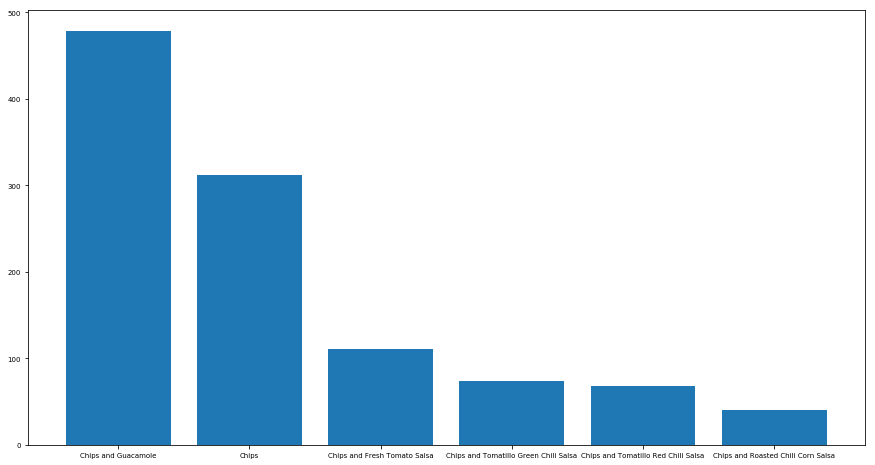

In [315]:
plt.bar(chip_orders.keys(), chip_orders.values()); #created bar plot of orders and used Tim's default figure editor in cell 1

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!
